In [2]:
import pandas as pd
import os
import numpy as np


In [4]:
os.chdir('C:\\RESEARCH')

In [5]:
X=pd.read_excel('LUAD_flux(1).xlsx',index_col=0)

In [6]:
X.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,'13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr',Neoplasm Disease Stage American Joint Committee on Cancer Code3
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,14.770344,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,Stage IV
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,34.017476,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,Stage IB


In [7]:
X.shape

(517, 1962)

In [8]:
x=X.iloc[:,0:1960].values
y=X.iloc[:,1961]

In [9]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [12]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [14]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]+cm[7][7]+cm[8][8]) / cm.sum())
accuracy

0.30120481927710846

Confusion Matrix, without normalization
[[ 0  1  0  0  0  0  0  0  0]
 [ 1 10  7  0  2  1  0  0  0]
 [ 0  4 10  3  2  1  0  0  0]
 [ 0  3  3  0  0  0  1  0  0]
 [ 1  6  6  0  1  1  0  0  0]
 [ 0  0  5  1  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  3  2  2  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]]


<Figure size 720x504 with 0 Axes>

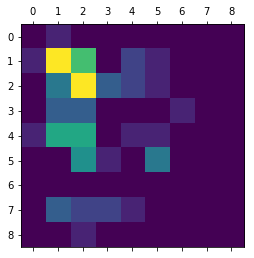

In [176]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.04761905 0.47619048 0.33333333 0.         0.0952381  0.04761905
  0.         0.         0.        ]
 [0.         0.2        0.5        0.15       0.1        0.05
  0.         0.         0.        ]
 [0.         0.42857143 0.42857143 0.         0.         0.
  0.14285714 0.         0.        ]
 [0.06666667 0.4        0.4        0.         0.06666667 0.06666667
  0.         0.         0.        ]
 [0.         0.         0.5        0.1        0.         0.4
  0.         0.         0.        ]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan]
 [0.         0.375      0.25       0.25       0.125      0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

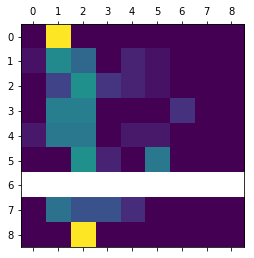

In [177]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [178]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.37      0.48      0.42        21
          2       0.29      0.50      0.37        20
          4       0.00      0.00      0.00         7
          5       0.17      0.07      0.10        15
          6       0.57      0.40      0.47        10
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         8
          9       0.00      0.00      0.00         1

avg / total       0.26      0.30      0.27        83



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [179]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.11930528683729495

In [180]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.20714248244576056

In [ ]:
"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
